#LGBM & XGBM




In [1]:
import numpy as np
import pandas as pd

#Exploratory Data Analysis (EDA):

In [2]:
data = pd.read_csv('/content/Titanic_train.csv')

In [3]:
data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
data.shape

(891, 12)

In [6]:
data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [7]:
data.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


In [8]:
# Remove rows with NaN values
data = data.dropna()

# Write the cleaned DataFrame back to a new CSV file
data.to_csv('cleaned_file.csv', index=False)
data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
10,11,1,3,"Sandstrom, Miss. Marguerite Rut",female,4.0,1,1,PP 9549,16.7000,G6,S
11,12,1,1,"Bonnell, Miss. Elizabeth",female,58.0,0,0,113783,26.5500,C103,S
...,...,...,...,...,...,...,...,...,...,...,...,...
871,872,1,1,"Beckwith, Mrs. Richard Leonard (Sallie Monypeny)",female,47.0,1,1,11751,52.5542,D35,S
872,873,0,1,"Carlsson, Mr. Frans Olof",male,33.0,0,0,695,5.0000,B51 B53 B55,S
879,880,1,1,"Potter, Mrs. Thomas Jr (Lily Alexenia Wilson)",female,56.0,0,1,11767,83.1583,C50,C
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S


In [9]:
data[data.duplicated()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked


In [10]:
data.drop_duplicates()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
10,11,1,3,"Sandstrom, Miss. Marguerite Rut",female,4.0,1,1,PP 9549,16.7000,G6,S
11,12,1,1,"Bonnell, Miss. Elizabeth",female,58.0,0,0,113783,26.5500,C103,S
...,...,...,...,...,...,...,...,...,...,...,...,...
871,872,1,1,"Beckwith, Mrs. Richard Leonard (Sallie Monypeny)",female,47.0,1,1,11751,52.5542,D35,S
872,873,0,1,"Carlsson, Mr. Frans Olof",male,33.0,0,0,695,5.0000,B51 B53 B55,S
879,880,1,1,"Potter, Mrs. Thomas Jr (Lily Alexenia Wilson)",female,56.0,0,1,11767,83.1583,C50,C
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S


In [11]:
data.corr(numeric_only=True)

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,0.148495,-0.089136,0.030933,-0.083488,-0.051454,0.029740
Survived,0.148495,1.000000,-0.034542,-0.254085,0.106346,0.023582,0.134241
Pclass,-0.089136,-0.034542,1.000000,-0.306514,-0.103592,0.047496,-0.315235
Age,0.030933,-0.254085,-0.306514,1.000000,-0.156162,-0.271271,-0.092424
SibSp,-0.083488,0.106346,-0.103592,-0.156162,1.000000,0.255346,0.286433
Parch,-0.051454,0.023582,0.047496,-0.271271,0.255346,1.000000,0.389740
Fare,0.029740,0.134241,-0.315235,-0.092424,0.286433,0.389740,1.000000


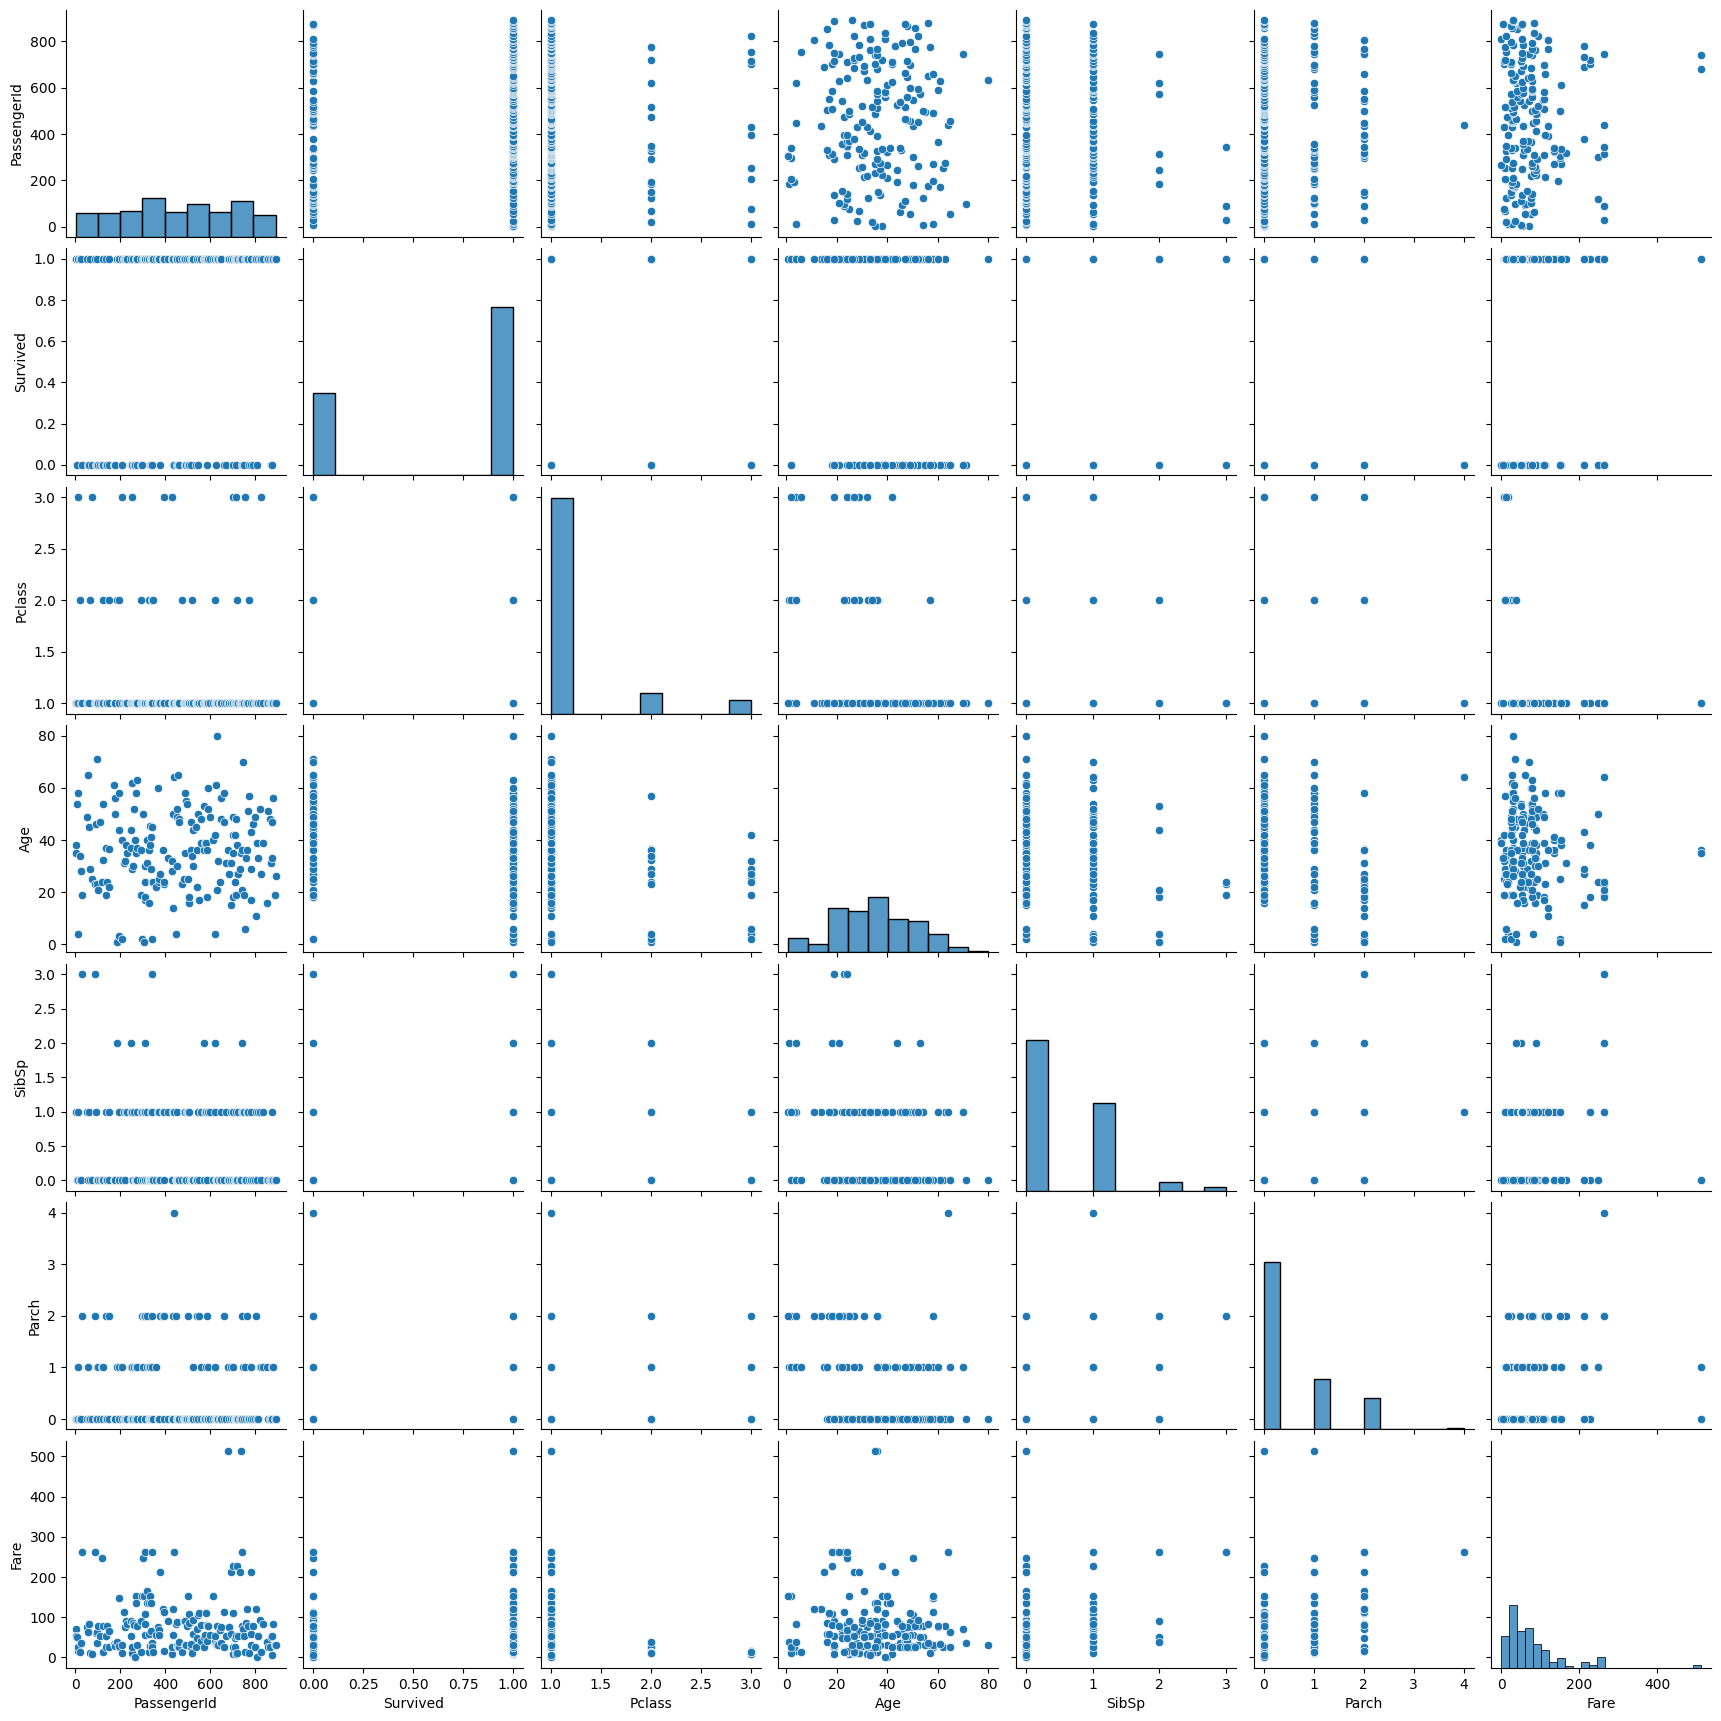

In [12]:
import seaborn as sns
sns.pairplot(data)

#Data Preprocessing:

In [13]:
from sklearn.preprocessing import LabelEncoder
label_encoders = {}
for column in data.select_dtypes(include=['object']).columns:
    label_encoders[column] = LabelEncoder()
    data[column] = label_encoders[column].fit_transform(data[column])
data

/tmp/ipython-input-456195625.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[column] = label_encoders[column].fit_transform(data[column])
/tmp/ipython-input-456195625.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[column] = label_encoders[column].fit_transform(data[column])
/tmp/ipython-input-456195625.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentati

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,2,1,1,49,0,38.0,1,0,109,71.2833,72,0
3,4,1,1,70,0,35.0,1,0,31,53.1000,48,2
6,7,0,1,112,1,54.0,0,0,55,51.8625,117,2
10,11,1,3,148,0,4.0,1,1,120,16.7000,131,2
11,12,1,1,27,0,58.0,0,0,26,26.5500,43,2
...,...,...,...,...,...,...,...,...,...,...,...,...
871,872,1,1,18,0,47.0,1,1,33,52.5542,91,2
872,873,0,1,35,1,33.0,0,0,89,5.0000,29,2
879,880,1,1,140,0,56.0,0,1,38,83.1583,61,0
887,888,1,1,75,0,19.0,0,0,10,30.0000,25,2


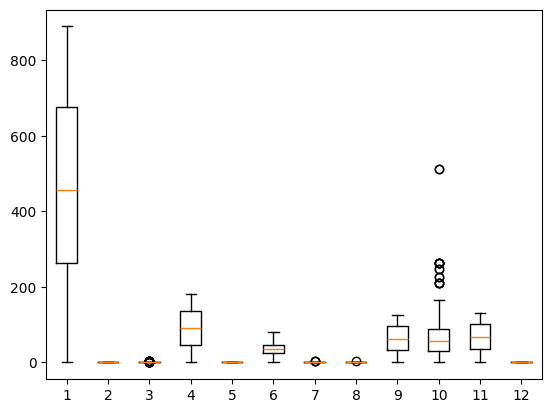

In [14]:
import matplotlib.pyplot as plt
plt.boxplot(data)
plt.show()

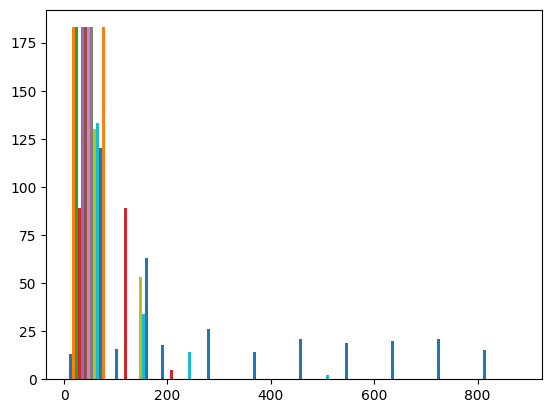

In [15]:
plt.hist(data)
plt.show()

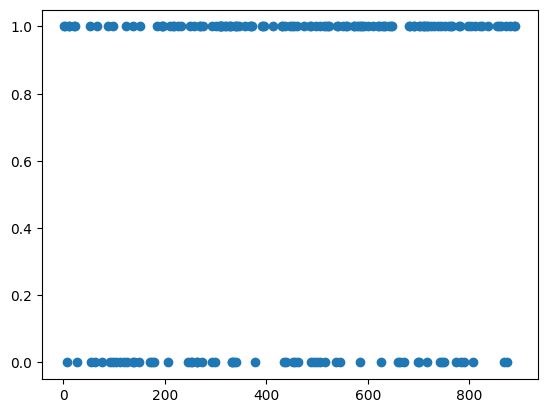

In [16]:
plt.scatter(data['PassengerId'],data['Survived'])

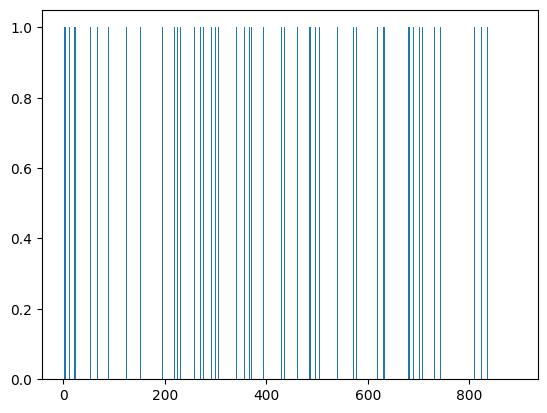

In [17]:
plt.bar(data['PassengerId'],data['Survived'])
plt.show()

#Building Predictive Models:

In [18]:
x=data.iloc[:,:-1] #independent varible
y=data.iloc[:,-1] #dependent varible
x.shape,y.shape

((183, 11), (183,))

In [19]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=0.8,random_state=42)
x_train,y_train

(     PassengerId  Survived  Pclass  Name  Sex   Age  SibSp  Parch  Ticket  \
 331          332         0       1   131    1  45.5      0      0      13   
 336          337         0       1   132    1  29.0      1      0      24   
 193          194         1       2   123    1   3.0      1      1      66   
 75            76         0       3   117    1  25.0      0      0      78   
 248          249         1       1    17    1  37.0      1      1      33   
 ..           ...       ...     ...   ...  ...   ...    ...    ...     ...   
 520          521         1       1   136    0  30.0      0      0      43   
 92            93         0       1    41    1  46.0      1      0     125   
 460          461         1       1     4    1  48.0      0      0      64   
 872          873         0       1    35    1  33.0      0      0      89   
 505          506         0       1   134    1  18.0      1      0     116   
 
          Fare  Cabin  
 331   28.5000     49  
 336   66.6000

#XGBoost algorithms

In [20]:
from xgboost import XGBClassifier
xgb_model=XGBClassifier()

In [21]:
xgb_model.fit(x_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              feature_weights=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, ...)

In [22]:
y_train_pred=xgb_model.predict(x_train)
y_train_pred

array([2, 2, 2, 2, 2, 2, 0, 0, 2, 0, 2, 2, 2, 0, 2, 2, 0, 2, 2, 2, 2, 0,
       2, 2, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 0, 2, 0, 0, 2, 0, 0, 2, 2, 0, 1, 2, 0, 2, 2, 2, 1, 0, 2, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 2, 0, 2, 0, 2, 0, 0, 0, 0, 0, 2, 2, 2, 2,
       2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 2, 0, 2, 0, 2, 2, 2, 0,
       2, 2, 2, 0, 0, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0, 2, 2, 2, 0, 0, 0, 2,
       2, 0, 2, 2, 0, 0, 0, 2, 2, 2, 2, 2, 2, 0])

In [23]:
y_test_pred=xgb_model.predict(x_test)
y_test_pred

array([0, 2, 0, 0, 2, 0, 0, 0, 2, 2, 0, 0, 2, 2, 2, 0, 0, 2, 2, 0, 2, 0,
       2, 2, 2, 2, 0, 2, 2, 2, 0, 2, 0, 0, 0, 0, 0])

In [24]:
from sklearn.metrics import classification_report,accuracy_score,confusion_matrix
print("\nXGBOOST Model Evaluation:")
print(classification_report(y_test,xgb_model.predict(x_test)))
print("Confusion Matrix:")
print(confusion_matrix(y_test,xgb_model.predict(x_test)))


XGBOOST Model Evaluation:
              precision    recall  f1-score   support

           0       0.74      0.78      0.76        18
           2       0.78      0.74      0.76        19

    accuracy                           0.76        37
   macro avg       0.76      0.76      0.76        37
weighted avg       0.76      0.76      0.76        37

Confusion Matrix:
[[14  4]
 [ 5 14]]


#LightGBM Algorithm

In [26]:
from lightgbm import LGBMClassifier
lgb_model=LGBMClassifier()
lgb_model.fit(x_train,y_train)

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000352 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 280
[LightGBM] [Info] Number of data points in the train set: 146, number of used features: 11
[LightGBM] [Info] Start training from score -1.133459
[LightGBM] [Info] Start training from score -4.290459
[LightGBM] [Info] Start training from score -0.408896
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits

LGBMClassifier()

In [27]:
y_pred = lgb_model.predict(x_train)
y_pred

array([2, 2, 2, 2, 2, 2, 0, 0, 2, 0, 2, 2, 2, 0, 2, 2, 0, 2, 2, 2, 2, 0,
       2, 2, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 0, 2, 0, 0, 2, 0, 0, 2, 2, 0, 1, 2, 0, 2, 2, 2, 1, 0, 2, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 2, 0, 2, 0, 2, 0, 0, 0, 0, 0, 2, 2, 2, 2,
       2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 2, 0, 2, 0, 2, 2, 2, 0,
       2, 2, 2, 0, 0, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0, 2, 2, 2, 0, 0, 0, 2,
       2, 0, 2, 2, 0, 0, 0, 2, 2, 2, 2, 2, 2, 0])

In [28]:
accuracy = accuracy_score(y_train, y_pred)
print("LightGBM Accuracy:", accuracy)

LightGBM Accuracy: 1.0


In [29]:
print("\nLightGBM  Model Evaluation:")
print(classification_report(y_test,lgb_model.predict(x_test)))
print("Confusion Matrix:")
print(confusion_matrix(y_test,lgb_model.predict(x_test)))


LightGBM  Model Evaluation:
              precision    recall  f1-score   support

           0       0.73      0.61      0.67        18
           2       0.68      0.79      0.73        19

    accuracy                           0.70        37
   macro avg       0.71      0.70      0.70        37
weighted avg       0.71      0.70      0.70        37

Confusion Matrix:
[[11  7]
 [ 4 15]]


#Comparative Analysis:

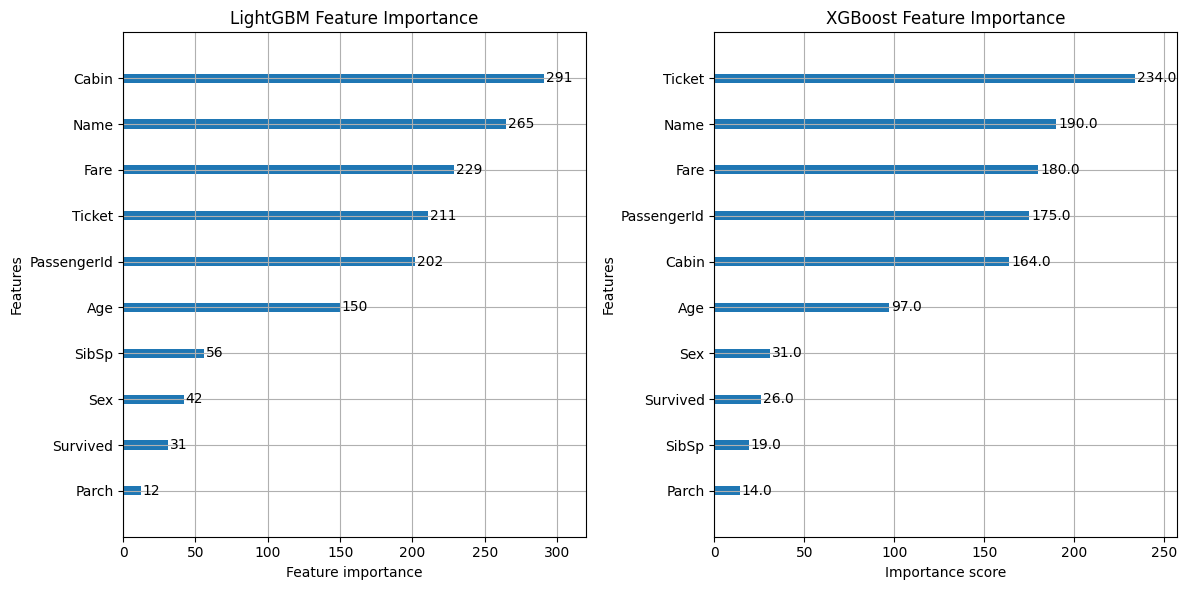

In [30]:
import lightgbm as lgb
import xgboost as xgb
fig, ax = plt.subplots(1, 2, figsize=(12, 6))
lgb.plot_importance(lgb_model, ax=ax[0])
ax[0].set_title("LightGBM Feature Importance")
xgb.plot_importance(xgb_model, ax=ax[1])
ax[1].set_title("XGBoost Feature Importance")
plt.tight_layout()
plt.show()
